# On Multiple Linear Regression - Codealong

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Let's import numpy, pandas, and make sure our matplotlib will
# appear inline.



The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get x's with subscripts beyond 2 it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

I want to focus here more on what coding a multiple regression looks like in Python. But you might be wondering: Is it possible to calculate the betas by hand?

Yes! See [here](https://stattrek.com/multiple-regression/regression-coefficients.aspx) for a nice explanation and example.

## Dealing with Categorical Variables

One issue we'd like to resolve is what to do with categorical variables, i.e. variables that represent categories rather than continua. In a Pandas DataFrame, these columns may well have strings or objects for values, but they need not. A certain heart-disease dataset from Kaggle, for example, has a target variable that takes values 0-4, each representing a different stage of heart disease.

### Dummying

One very effective way of dealing with categorical variables is to dummy them out. What this involves is making a new column for _each categorical value in the column we're dummying out_.

These new columns will be filled only with 0's and 1's, a 1 representing the presence of the relevant categorical value.

Let's look at a simple example:

In [2]:
# Read in the comma_use dataset.

comma_use = pd.read_csv('comma-survey.csv')

For more on this dataset see [here](https://fivethirtyeight.com/features/elitist-superfluous-or-popular-we-polled-americans-on-the-oxford-comma/).

In [3]:
# Let's look at the head.
comma_use.head(10).T


,0,1,2,3,4,5,6,7,8,9
RespondentID,3292953864,3292950324,3292942669,3292932796,3292932522,3292926586,3292908135,3292869879,3292863455,3292860428
"In your opinion, which sentence is more gramatically correct?","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind...","It's important for a person to be honest, kind..."
"Prior to reading about it above, had you heard of the serial (or Oxford) comma?",Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No
"How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",Some,Not much,Some,Some,Not much,A lot,A lot,A lot,A lot,Not at all
How would you write the following sentence?,"Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,...","Some experts say it's important to drink milk,..."
"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?",No,No,Yes,No,No,Yes,Yes,No,No,Yes
"How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?",Not much,Not much,Not at all,Some,Not much,Some,Some,A lot,Not much,Some
"In your opinion, how important or unimportant is proper use of grammar?",Somewhat important,Somewhat unimportant,Very important,Somewhat important,NaN,Very important,Very important,Very important,Very important,Very important
Gender,Male,Male,Male,Male,NaN,Male,Male,Male,Male,Male
Age,30-44,30-44,30-44,18-29,NaN,18-29,18-29,18-29,30-44,30-44


In [4]:
# What's the shape of this dataframe?

comma_use.shape

(1129, 13)

In [5]:
comma_use.isnull().sum().sum()

924

In [6]:
# Let's drop all rows with any null values.

comma_clean = comma_use.dropna()

In [7]:
# What's the shape of our dataframe now?

comma_clean.shape

(825, 13)

In [8]:
# Let's try using sklearn's OneHotEncoder to create our dummy columns:

from sklearn.preprocessing import OneHotEncoder

In [9]:
!pip freeze | grep 'scikit-learn'

scikit-learn==0.21.3


In [10]:
ohe = OneHotEncoder(drop='first')

In [11]:
comma_trans = ohe.fit_transform(comma_clean.drop('RespondentID', axis=1))

Could we have used ```pd.get_dummies()``` instead?

Well, yes. And in fact ```get_dummies()``` is in some ways easier; for one thing, it's built right into Pandas. But there are drawbacks with it as well. See the *bottom* of [this link](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons) for a good explanation.

So what did the encoder do?

In [12]:
comma_trans

<825x34 sparse matrix of type '<class 'numpy.float64'>'
	with 7174 stored elements in Compressed Sparse Row format>

In [13]:
comma_trans.todense()

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
ohe.get_feature_names()

array(["x0_It's important for a person to be honest, kind, and loyal.",
       'x1_Yes', 'x2_Not at all', 'x2_Not much', 'x2_Some',
       "x3_Some experts say it's important to drink milk, but the data is inconclusive.",
       'x4_Yes', 'x5_Not at all', 'x5_Not much', 'x5_Some',
       'x6_Somewhat important', 'x6_Somewhat unimportant',
       'x6_Very important', 'x6_Very unimportant', 'x7_Male', 'x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999', 'x9_$150,000+',
       'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999',
       'x10_Graduate degree', 'x10_High school degree',
       'x10_Less than high school degree',
       'x10_Some college or Associate degree', 'x11_East South Central',
       'x11_Middle Atlantic', 'x11_Mountain', 'x11_New England',
       'x11_Pacific', 'x11_South Atlantic', 'x11_West North Central',
       'x11_West South Central'], dtype=object)

In [16]:
df = pd.DataFrame(comma_trans.todense(), columns=ohe.get_feature_names())
df.head()

,"x0_It's important for a person to be honest, kind, and loyal.",x1_Yes,x2_Not at all,x2_Not much,x2_Some,"x3_Some experts say it's important to drink milk, but the data is inconclusive.",x4_Yes,x5_Not at all,x5_Not much,x5_Some,...,x10_Less than high school degree,x10_Some college or Associate degree,x11_East South Central,x11_Middle Atlantic,x11_Mountain,x11_New England,x11_Pacific,x11_South Atlantic,x11_West North Central,x11_West South Central
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wine Dataset

In [18]:
#Read in the wine dataset
wine = pd.read_csv('wine.csv')


In [19]:
# Check out the head
wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [21]:
# Any nulls? Any non-numerical values?
# Let's use .info()
wine.info()
wine.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red_wine                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


(6497, 13)

## Model Selection

Let's imagine that I'm going to try to predict wine quality based on the other features.

Now: Which columns (predictors) should I choose? There are 12 predictors I could choose from For each of these predictors, I could either use it or not use it in my model, which means that there are 2^12 = 4096 different models I could construct! Well, okay, one of these is the "empty model" with no predictors in it. But there are still 4095 models from which I can choose.

How can I decide which predictors to use in my model?

### Correlation

In [22]:
# Use the .corr() DataFrame method to find out about the
# correlation values between all pairs of variables!

wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


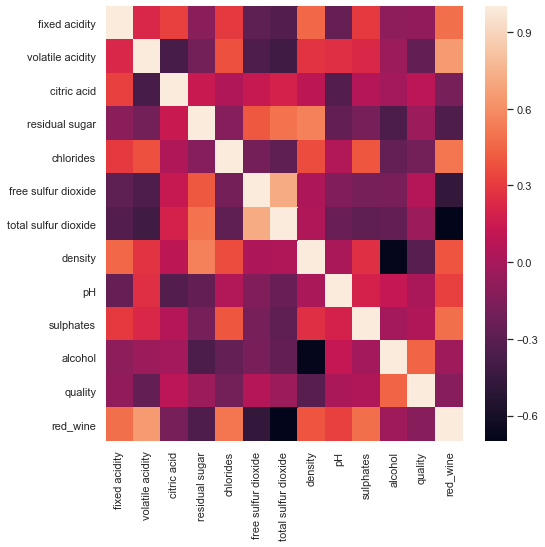

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(wine.corr())

In [28]:
# Let's look at the correlations with 'quality'
# (our dependent variable) in particular.
# Since wine.corr()['quality'] is a Series,
# we can call .sort_values() on it.

wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red_wine               -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [31]:
X = wine[['alcohol', 'density']]
y = wine['quality']

In [32]:
# Let's choose alcohol and density as our predictors



## Multiple Regression in StatsModels

In [33]:
import statsmodels.api as sm

In [34]:
predictors = sm.add_constant(X)
model = sm.OLS(y, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     798.7
Date:                Thu, 15 Aug 2019   Prob (F-statistic):          7.48e-311
Time:                        15:04:30   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6494   BIC:                         1.527e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8095      4.512      0.623      0.533      -6.035      11.654
alcohol        0.3246      0.011     28.991      0.000       0.303       0.347
density       -0.3991      4.454     -0.090      0.929      -9.130       8.332
==============================================================================
Omnibus:                      123.912   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.761
Skew:                           0.031   Prob(JB):                     6.47e-57
Kurtosis:                       3.976   Cond. No.                     6.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Let's try a new model that also includes
# the volatile acidity.

X2 = wine[['alcohol', 'density', 'volatile acidity']]

In [36]:
predictors = sm.add_constant(X2)
model = sm.OLS(np.asarray(y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     789.6
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:07:27   Log-Likelihood:                -7327.4
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6493   BIC:                         1.469e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -35.1141      4.572     -7.679      0.000     -44.078     -26.151
alcohol              0.3825      0.011     34.935      0.000       0.361       0.404
density             37.6250      4.522      8.321      0.000      28.761      46.489
volatile acidity    -1.4909      0.060    -24.887      0.000      -1.608      -1.373
==============================================================================
Omnibus:                      115.319   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.492
Skew:                          -0.002   Prob(JB):                     7.30e-52
Kurtosis:                       3.933   Cond. No.                     7.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Regression in Scikit-Learn

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [38]:
# Let's split our data into train and test sets.
# Let's also set a random state for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1), wine['quality'], random_state=42)

In [ ]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit() and transform() methods.

In [40]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [50]:

# Now we can fit a LinearRegression object to our training data!
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

# And score it on our testing set

lr.score(X_test_sc, y_test)

0.2658526046365901

In [51]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([ 0.12299825, -0.24743059, -0.01388299,  0.31156044, -0.01082602,
        0.10556752, -0.08977311, -0.31739243,  0.08226046,  0.11596695,
        0.27739232,  0.14073563])

In [52]:
# And .intercept_

lr.intercept_

5.821633825944173

## Recursive Feature Elimination

The idea behind recursive feature elimination is to start with all predictive features and then build down to a small set of features slowly, by eliminating the features with the lowest coefficients.

That is:
1. Start with a model with _all_ $n$ predictors;
2. find the predictor with the smallest coefficient;
3. throw that predictor out and build a model with the remining $n-1$ predictors;
4. set $n = n-1$ and repeat until $n-1$ has the value you want!

### Recursive Feature Elimination in Scikit-Learn

In [25]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)
select = select.fit(X = X_train_sc,
                    y = Y_train)

# select.support_

In [26]:
# select.ranking_

### Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to meaure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score.

In [27]:
#metrics.r2_score(Y_test, lr.predict(X_test))

In [28]:
#metrics.mean_absolute_error(Y_test, lr.predict(X_test))

In [29]:
#metrics.mean_squared_error(Y_test, lr.predict(X_test))